In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [5]:
from collections import Counter
from scipy.stats import chisquare, entropy

def is_uniformly_distributed(numbers):
    expected_frequency = len(numbers) / len(set(numbers))
    observed_frequency, _ = np.histogram(numbers, bins=len(set(numbers)))
    return chisquare(observed_frequency, f_exp=expected_frequency)


def shannon_entropy(data):
    counts = Counter(data)
    probabilities = [count / len(data) for count in counts.values()]
    return entropy(probabilities, base=2)

In [ ]:
timing = pd.read_csv('timing_results.csv')
timing.head()

,n,Function,Time
0,10000,LCG,0.000034
1,10000,MersenneTwister,0.000204
2,10000,Xorshift,0.000079
3,10000,RDRand,0.002016
4,100000,LCG,0.000392


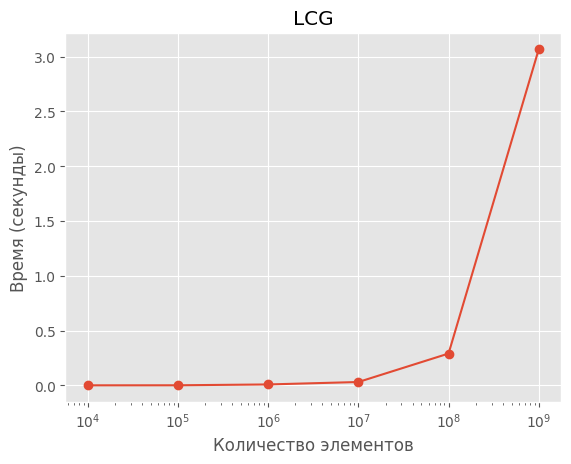

Минимальное время: 3.36e-05 секунд
Максимальное время: 3.06744 секунд


In [ ]:
lcg_timing = timing[timing['Function'] == 'LCG']

plt.plot(lcg_timing['n'], lcg_timing['Time'], marker='o', linestyle='-')
plt.title('LCG')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(lcg_timing['Time'])} секунд")
print(f"Максимальное время: {max(lcg_timing['Time'])} секунд")

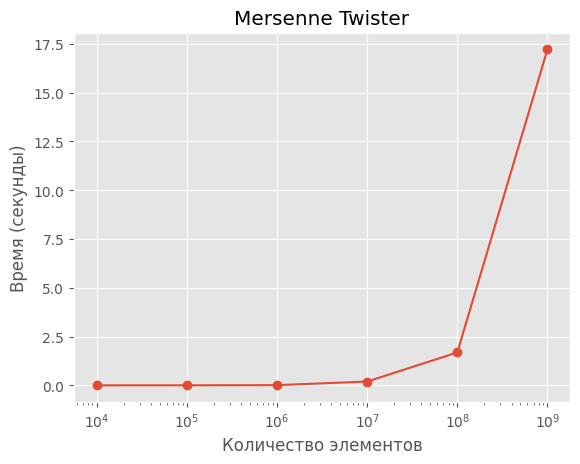

Минимальное время: 0.000204 секунд
Максимальное время: 17.2235 секунд


In [ ]:
mt_timing = timing[timing['Function'] == 'MersenneTwister']

plt.plot(mt_timing['n'], mt_timing['Time'], marker='o', linestyle='-')
plt.title('Mersenne Twister')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(mt_timing['Time'])} секунд")
print(f"Максимальное время: {max(mt_timing['Time'])} секунд")

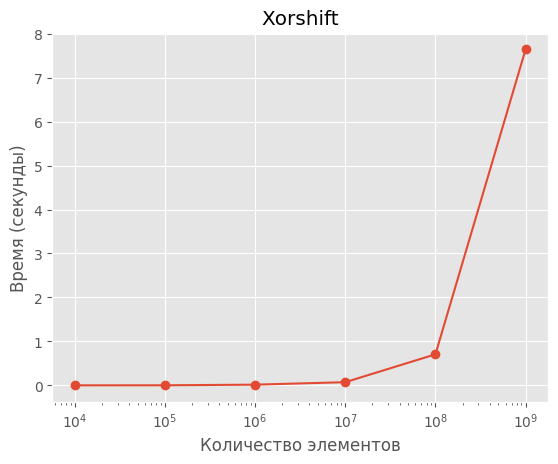

Минимальное время: 7.9e-05 секунд
Максимальное время: 7.64415 секунд


In [ ]:
xs_timing = timing[timing['Function'] == 'Xorshift']

plt.plot(xs_timing['n'], xs_timing['Time'], marker='o', linestyle='-')
plt.title('Xorshift')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(xs_timing['Time'])} секунд")
print(f"Максимальное время: {max(xs_timing['Time'])} секунд")

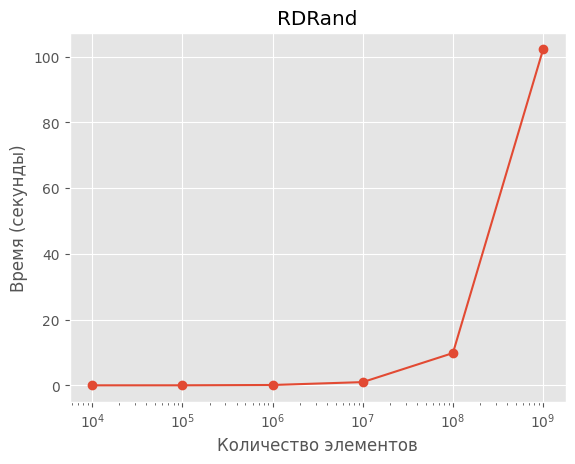

Минимальное время: 0.0020164 секунд
Максимальное время: 102.261 секунд


In [ ]:
rd_timing = timing[timing['Function'] == 'RDRand']

plt.plot(rd_timing['n'], rd_timing['Time'], marker='o', linestyle='-')
plt.title('RDRand')
plt.xlabel('Количество элементов')
plt.ylabel('Время (секунды)')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Минимальное время: {min(rd_timing['Time'])} секунд")
print(f"Максимальное время: {max(rd_timing['Time'])} секунд")

In [6]:
def read_from_file(filename):
    numbers = []
    with open(filename, 'r') as file:
        for line in file:
            number = int(line.strip())
            numbers.append(number)
    return numbers

lcg_cpp_sample = read_from_file('lcg_sample.txt')
mtw_cpp_sample = read_from_file('mt_sample.txt')
xor_cpp_sample = read_from_file('xorshift_sample.txt')
rd_cpp_sample = read_from_file('rdrand_sample.txt')

Уникальных значений: 100000
Хи-квадрат p-value: 0.6681564409028524
Энтропия Шеннона: 16.609640474436805


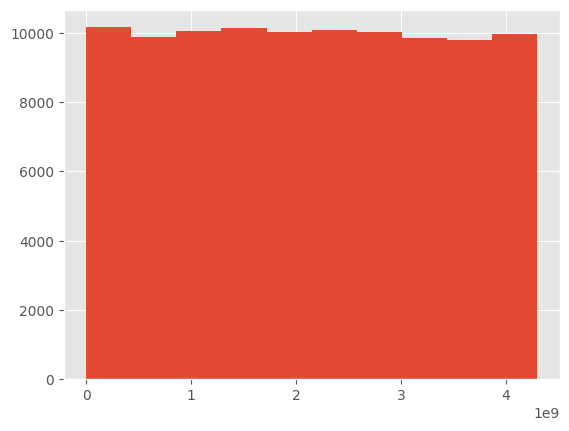

In [9]:
plt.hist(lcg_cpp_sample)
_, p_value = is_uniformly_distributed(lcg_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(lcg_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(lcg_cpp_sample)}')

Уникальных значений: 99999
Хи-квадрат p-value: 0.4092432560207141
Энтропия Шеннона: 16.609620474436806


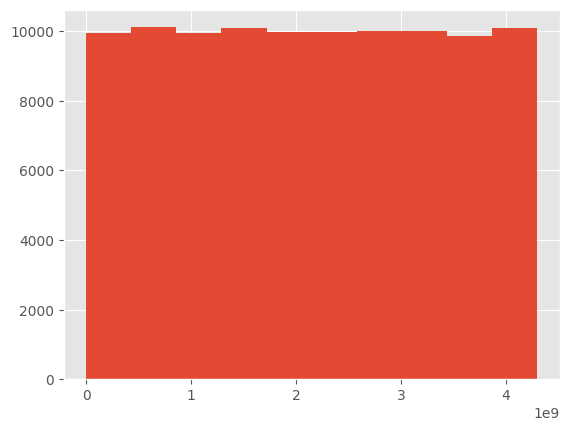

In [10]:
plt.hist(mtw_cpp_sample)
_, p_value = is_uniformly_distributed(mtw_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(mtw_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(mtw_cpp_sample)}')

Уникальных значений: 100000
Хи-квадрат p-value: 0.1049951244232371
Энтропия Шеннона: 16.609640474436805


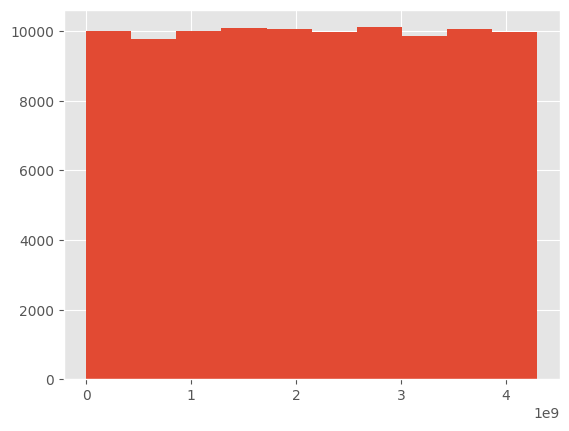

In [11]:
plt.hist(xor_cpp_sample)
_, p_value = is_uniformly_distributed(xor_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(xor_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(xor_cpp_sample)}')

Уникальных значений: 100000
Хи-квадрат p-value: 0.2961561666319239
Энтропия Шеннона: 16.609640474436805


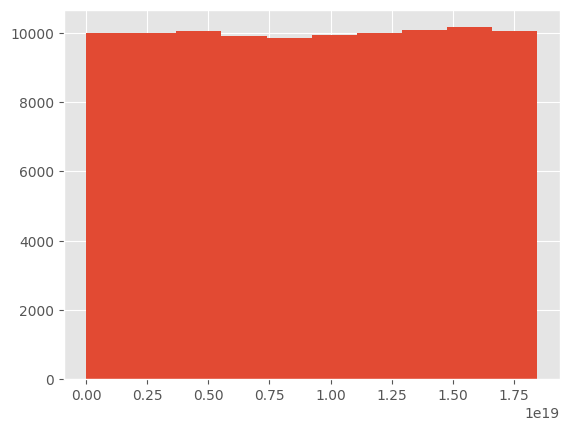

In [12]:
plt.hist(rd_cpp_sample)
_, p_value = is_uniformly_distributed(rd_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(rd_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(rd_cpp_sample)}')